In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from util import *
import numpy as np

df = pd.read_csv('b5_0308_132955_PM.csv')
df = clean_df(df)


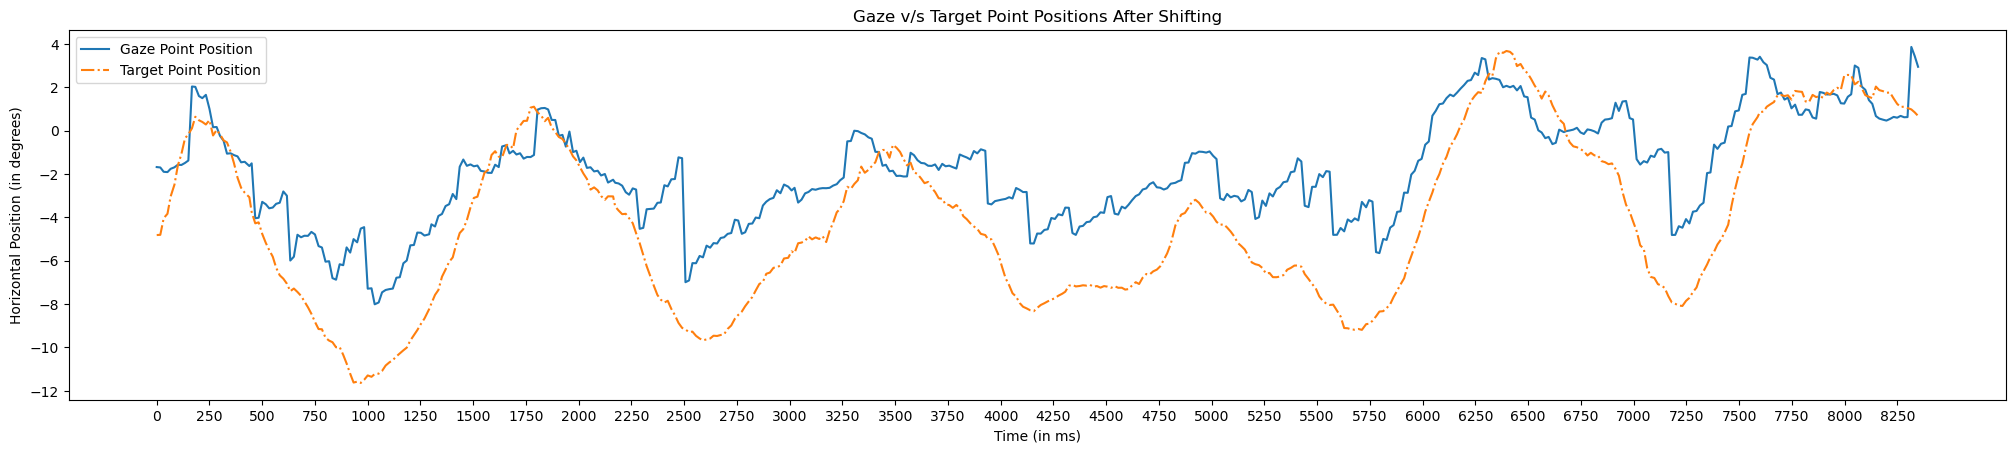

In [5]:
x = df.seconds.astype(float).fillna(0.0).apply(lambda x: (x - df.iloc[1500]['seconds'])*1000)[1500:2000]
y1 = df.target_vis_x.astype(float).fillna(0.0)[1500:2000]
y2 = df.gaze_vis_x.astype(float).fillna(0.0)[1500:2000]
y3 = df.gaze_vis_x.astype(float).fillna(0.0)[1512:2012]
# [df2,i] = shifted_df(df)
plt.figure().set_figwidth(25)
plt.plot(x, y3, label='Static Target')
plt.plot(x, y1, '-.', label='f Target')
plt.xticks(np.arange(min(x), max(x)+1, 250.0))
plt.legend(["Gaze Point Position","Target Point Position"], loc=0)

# Now convert and plot:
plt.xlabel("Time (in ms)")
plt.ylabel("Horizontal Position (in degrees)")
plt.title('Gaze v/s Target Point Positions After Shifting')
plt.show()


In [4]:

def shifted_euc_error_h(df, shift):
    # df = vis_angles_from_file(f)
    error = 0
    count = 0
    data = df[:-shift]
    if shift==0:
        data = df

    for index, row in data.iterrows():
        if row['PathIDX']==99 or row['blinks']:
            continue
        error += abs(row['target_vis_x'] - df.iloc[index + shift]['gaze_vis_x'])
        error += abs(row['target_vis_y'] - df.iloc[index + shift]['gaze_vis_y'])
        count+=1
    return error/count


min_error = float('inf')
idx = 0

for shift in range(30):
    e_after_shift = shifted_euc_error_h(df,shift)
    # print(e_after_shift)
    if min_error > e_after_shift:
        min_error = e_after_shift
        idx = shift

shifted_df = df[:-idx]
shifted_df['gaze_vis_x'] = df['gaze_vis_x'][idx:]
shifted_df['gaze_vis_y'] = df['gaze_vis_y'][idx:]


KeyError: 'PathIDX'

In [ ]:

x = shifted_df.seconds.astype(float).fillna(0.0).apply(lambda x: (x - shifted_df.iloc[1500]['seconds'])*1000)[1500:2000]
y1 = shifted_df.gaze_vis_x.astype(float).fillna(0.0)[1500:2000]
y2 = shifted_df.target_vis_x.astype(float).fillna(0.0)[1500:2000]

plt.figure().set_figwidth(50)
plt.plot(x, y1)
plt.plot(x, y2, '-.')
plt.xticks(np.arange(min(x), max(x)+1, 250.0))

# Now convert and plot:
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()
# return [idx, df[]]

In [ ]:

latency = df.iloc[idx]['seconds']*1000

